# **Importing Libraries :**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset :**

In [2]:
df=pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Distribution of customer education level**

In [4]:
education_level_distribution = df['Education'].value_counts()
education_level_distribution

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

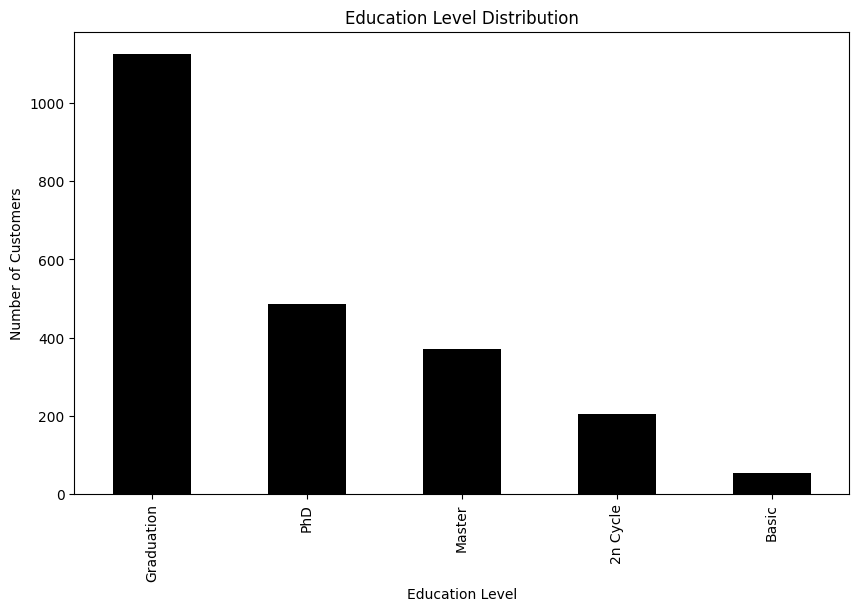

In [6]:
plt.figure(figsize=(10,6))
df['Education'].value_counts().plot(kind='bar', color='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

# **What is the age distribution of customers?**

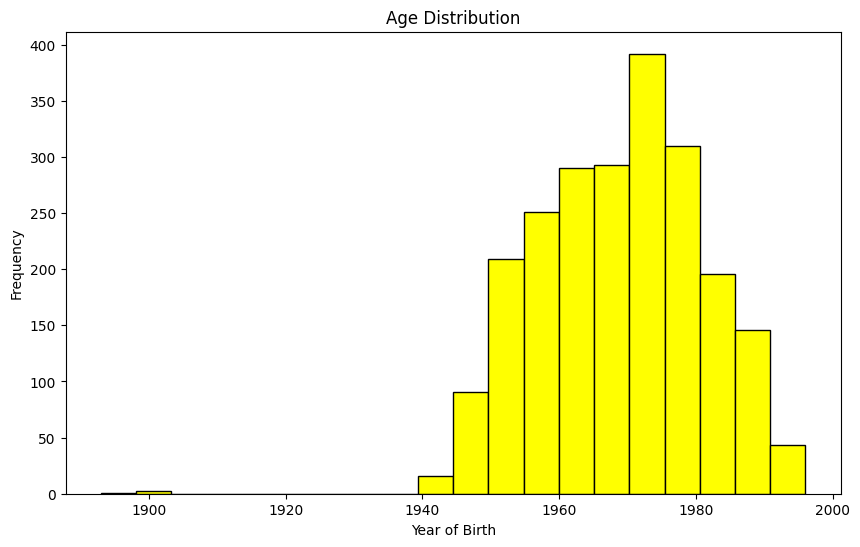

In [8]:
plt.figure(figsize=(10,6))
df['Year_Birth'].plot(kind='hist', bins=20,color ='yellow', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

# **What is the average annual income of customers?**

In [9]:
average_income = df['Income'].mean()
print(f'Average Income: {average_income}')

Average Income: 52247.25135379061


# **What are the most frequently purchased products (wine, fruits, meat products, etc.)?**

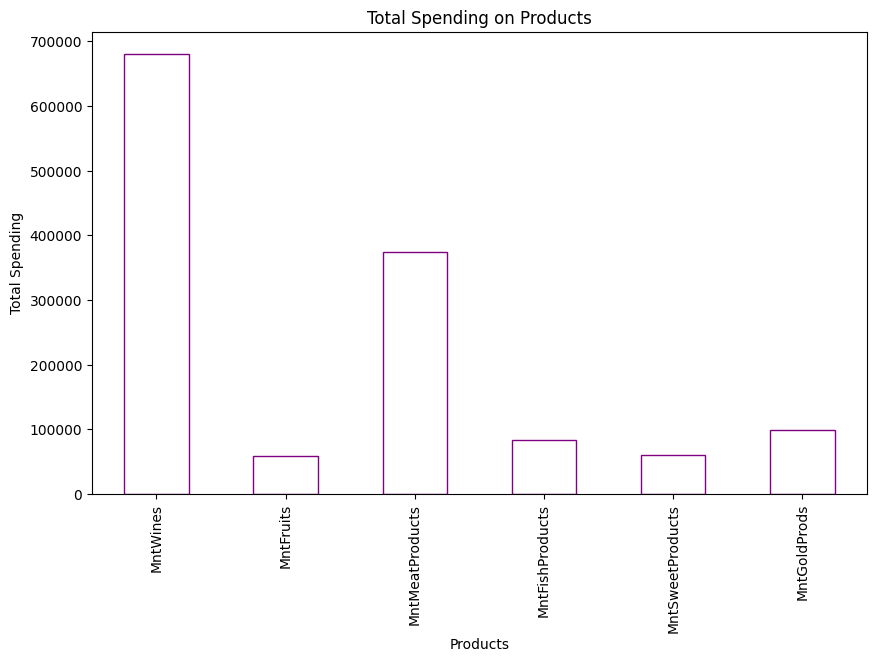

In [15]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = df[products].sum()
plt.figure(figsize=(10,6))
total_spent.plot(kind='bar', color='white', edgecolor='purple')
plt.title('Total Spending on Products')
plt.xlabel('Products')
plt.ylabel('Total Spending')
plt.show()

# **How does the rate of spending on products differ between different age groups?**

/tmp/ipykernel_33/3553505911.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age = df.groupby('Age_Group')[products].mean()


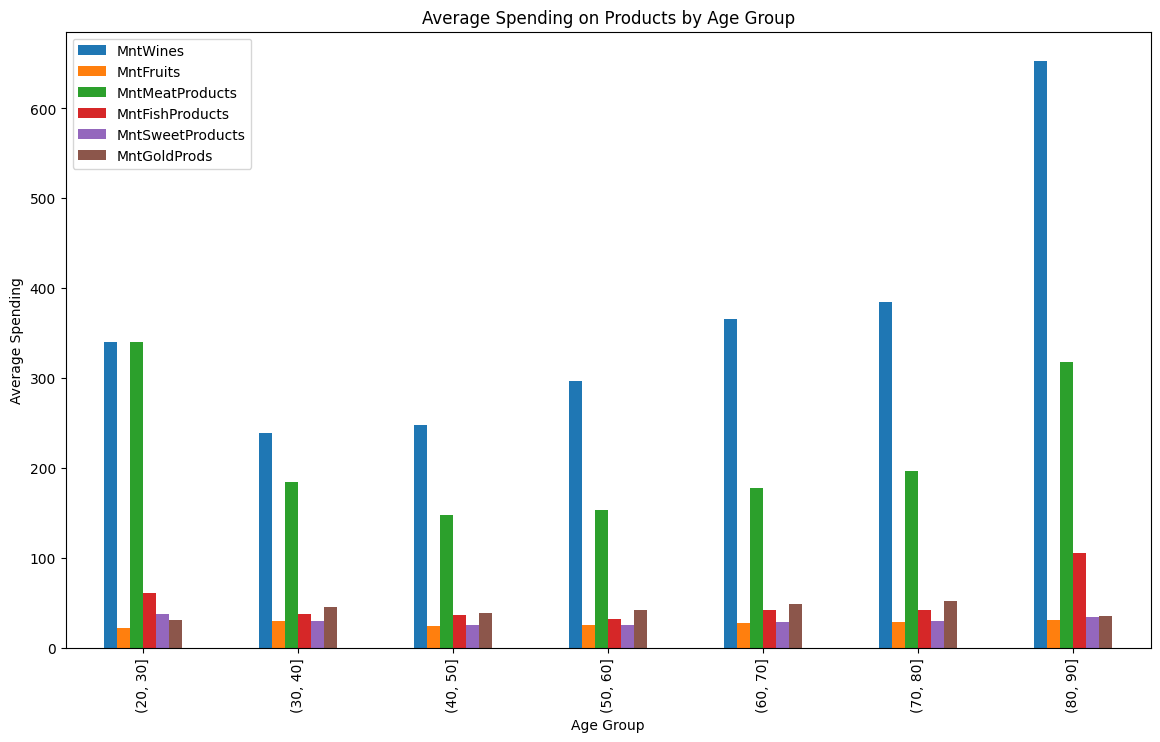

In [16]:
df['Age'] = 2024 - df['Year_Birth']
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

spending_by_age = df.groupby('Age_Group')[products].mean()
spending_by_age.plot(kind='bar', figsize=(14,8))
plt.title('Average Spending on Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

# **Is there a difference in spending rate between married and single customers?**

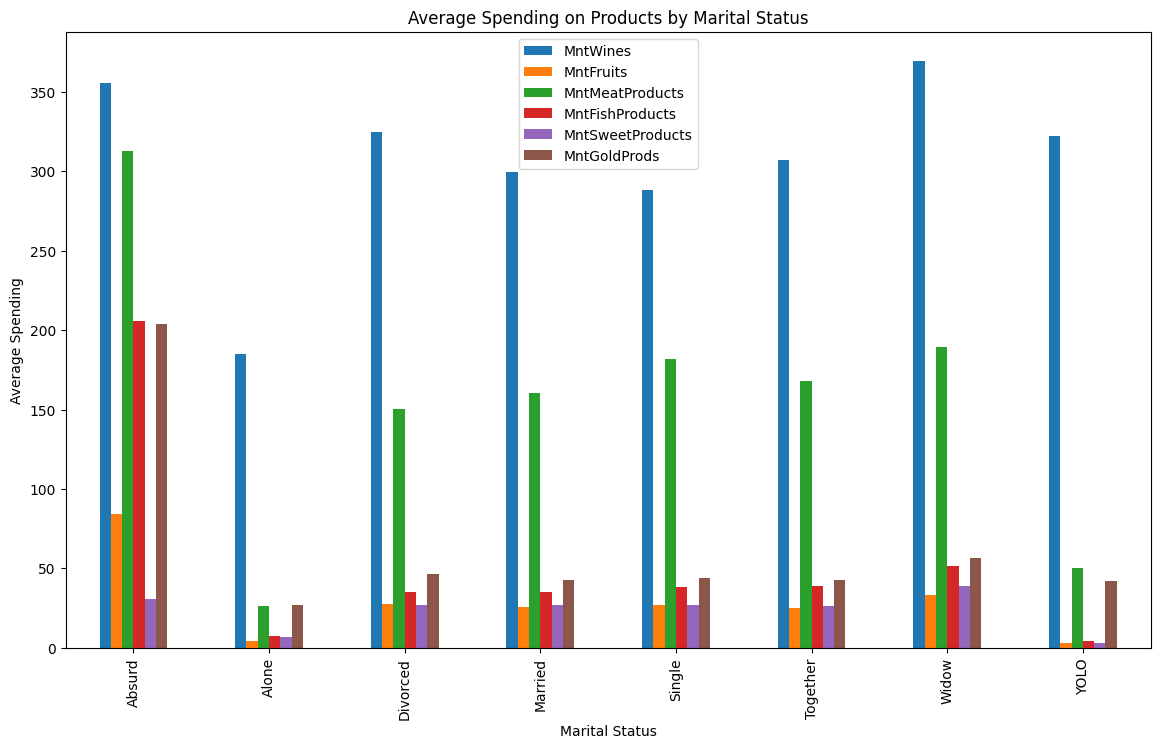

In [17]:
spending_by_marital_status = df.groupby('Marital_Status')[products].mean()
spending_by_marital_status.plot(kind='bar', figsize=(14,8))
plt.title('Average Spending on Products by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.show()

# **Is the rate of purchasing online different from purchasing in stores?**

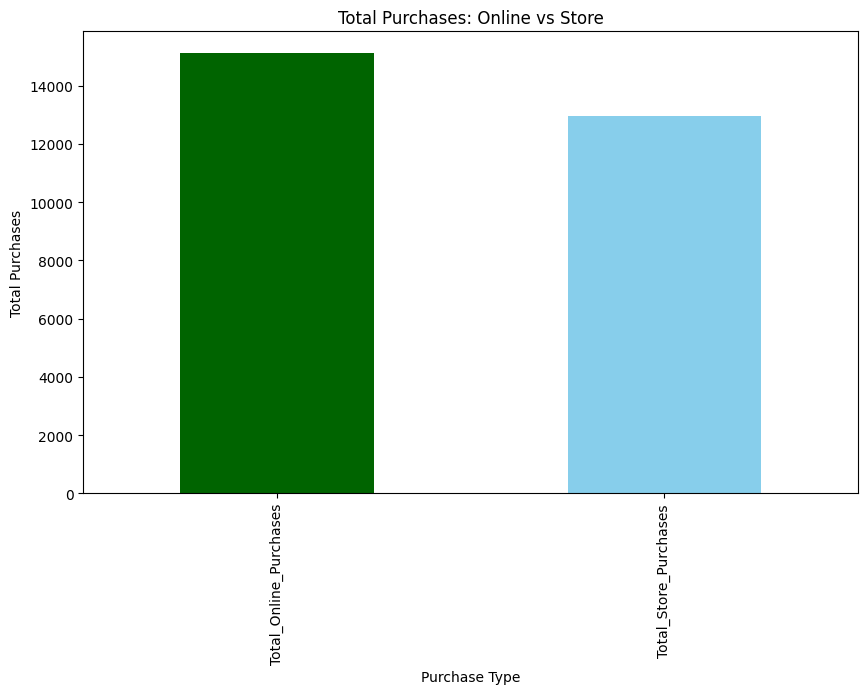

In [20]:
df['Total_Online_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
df['Total_Store_Purchases'] = df['NumStorePurchases']

online_vs_store = df[['Total_Online_Purchases', 'Total_Store_Purchases']].sum()
plt.figure(figsize=(10,6))
online_vs_store.plot(kind='bar', color=['darkgreen', 'skyblue'])
plt.title('Total Purchases: Online vs Store')
plt.xlabel('Purchase Type')
plt.ylabel('Total Purchases')
plt.show()

# **Is there a relationship between a customer's income and the number of online purchases?**

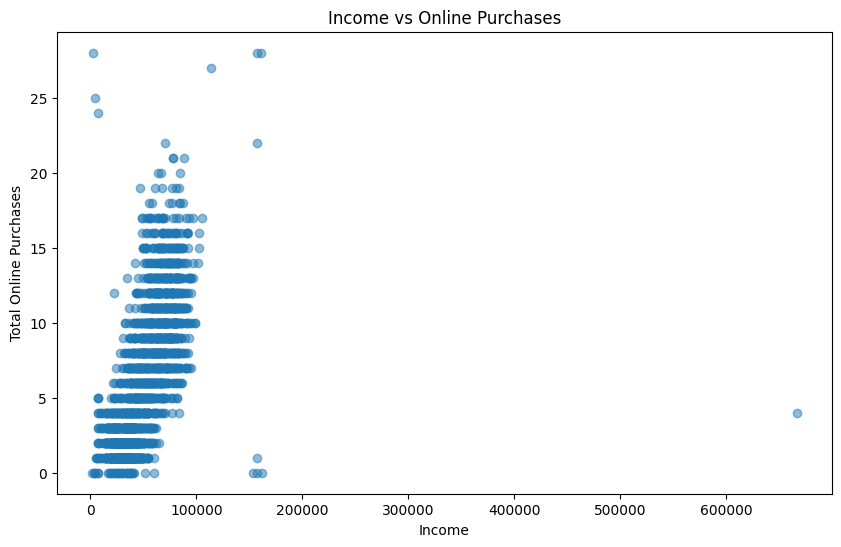

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['Income'], df['Total_Online_Purchases'], alpha=0.5)
plt.title('Income vs Online Purchases')
plt.xlabel('Income')
plt.ylabel('Total Online Purchases')
plt.show()

# **What is the relationship between age and the number of monthly visits to the site?**

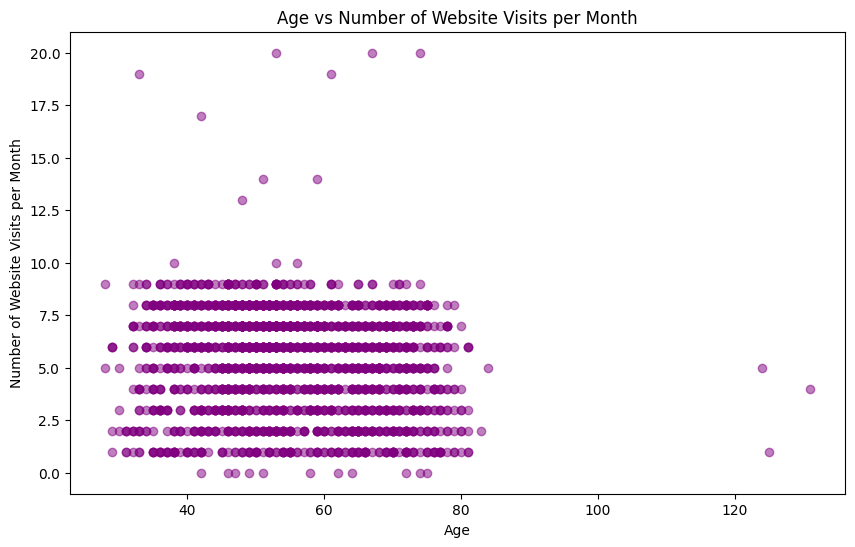

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['NumWebVisitsMonth'], alpha=0.5, color='purple')
plt.title('Age vs Number of Website Visits per Month')
plt.xlabel('Age')
plt.ylabel('Number of Website Visits per Month')
plt.show()

# **What factors affect customer acceptance of promotional offers?**

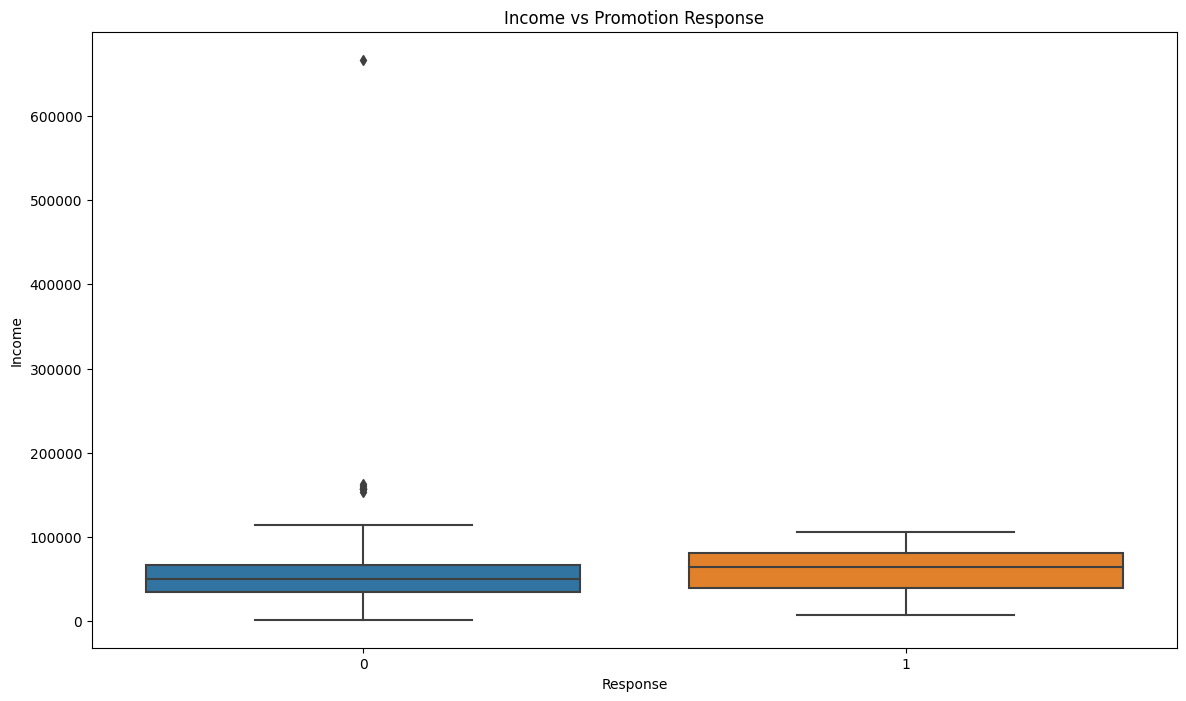

In [25]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Income vs Promotion Response')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

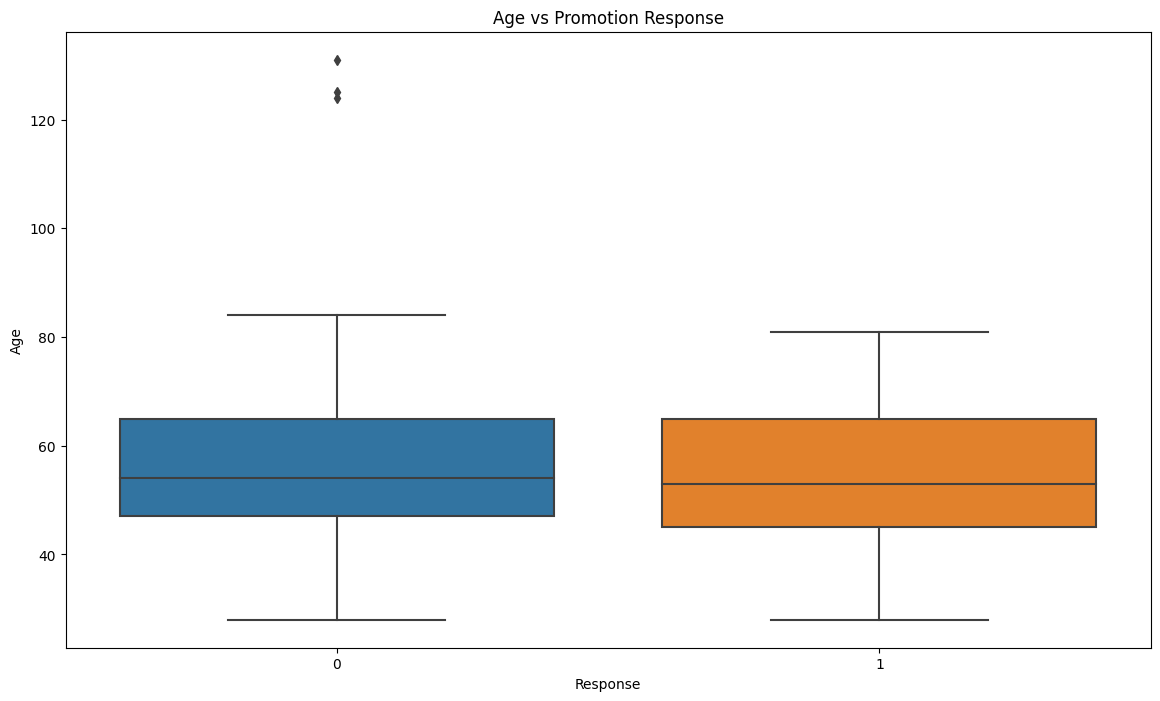

In [26]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Promotion Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

# **What factors affect customer complaints?**

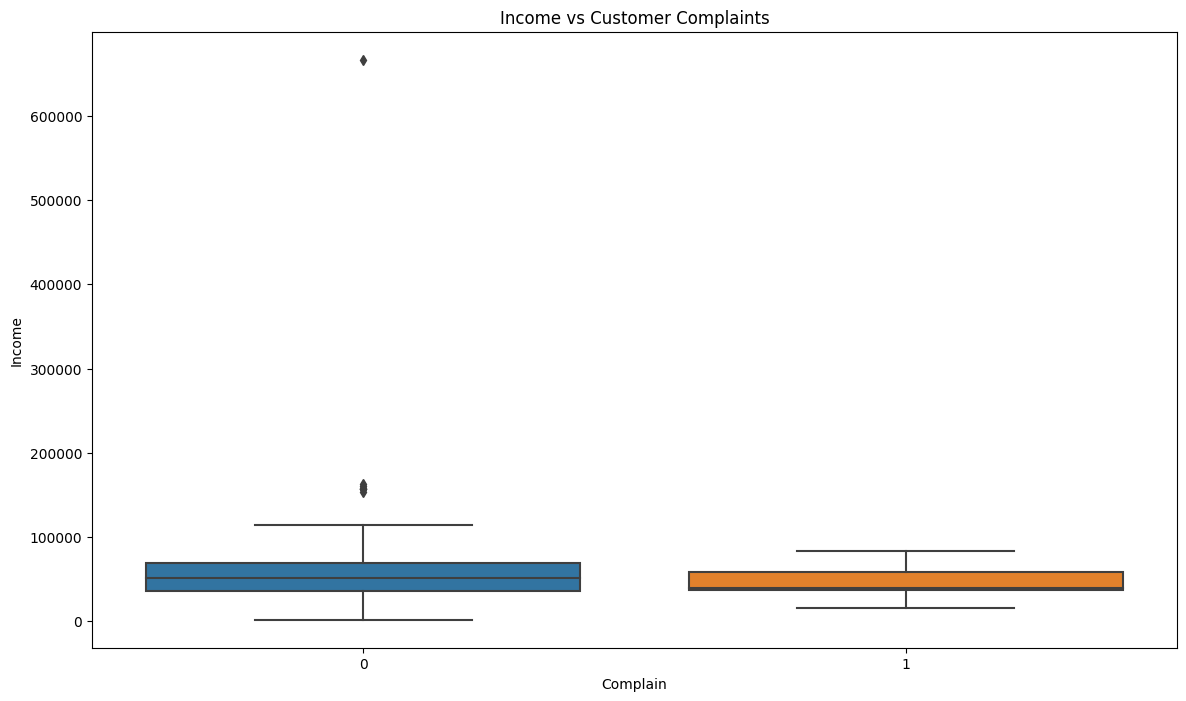

In [27]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Complain', y='Income', data=df)
plt.title('Income vs Customer Complaints')
plt.xlabel('Complain')
plt.ylabel('Income')
plt.show()

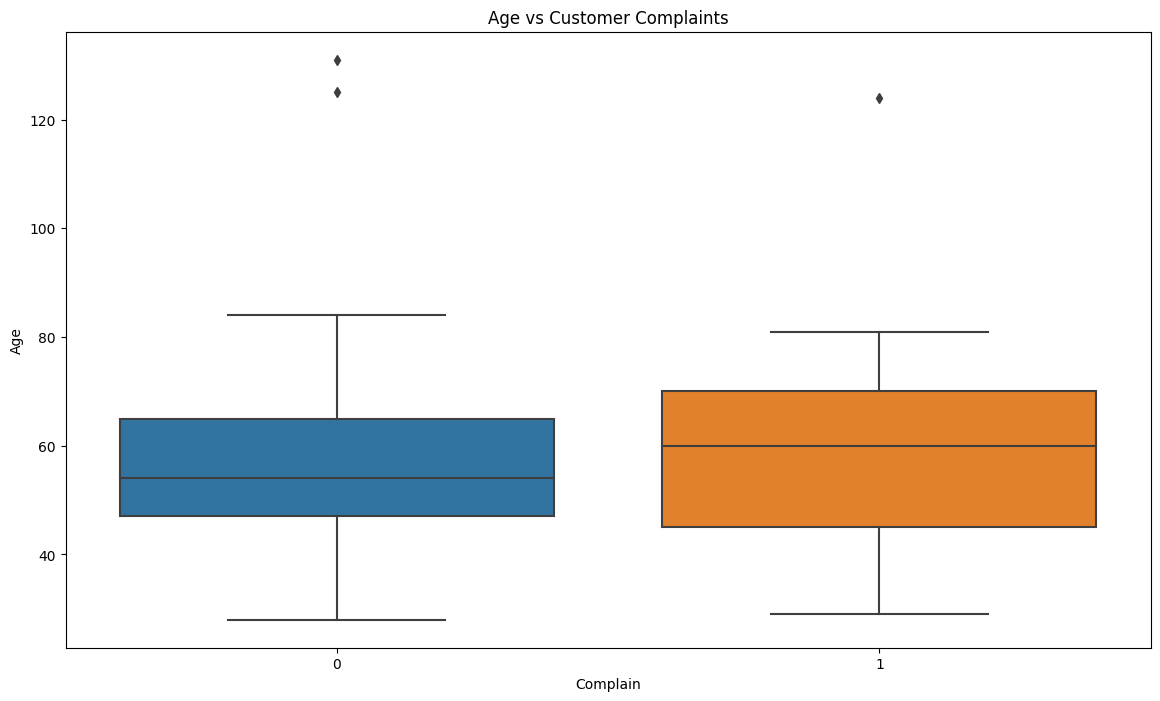

In [28]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Complain', y='Age', data=df)
plt.title('Age vs Customer Complaints')
plt.xlabel('Complain')
plt.ylabel('Age')
plt.show()

In [30]:
# END